In [1]:
#### This project is based on KNN Neighbours where we will be provided with the data set
## this data set will be a classified data set and we would be not aware of the columns
### from the above statement i mean that columns would be present but we won't know what they actually imply
### in such cases we would have to build a model to predict the variable target class and then check the metrics around it
### In scenarios like this , I would often go KNN Neighbourd algorithm
### LET'S GET STARTED!!!

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [3]:
classifiedData=pd.read_csv('KNN_Project_Data')

In [4]:
classifiedData.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
## as you can see above we don't know what the columns imply
## we would just have to build a model to predict the variable target class
## and then check with classification report the metrics of the model

In [6]:
### it is important to scale the data first in KNN approach
## The reason is you at the data closely , we are seeing a wide range of the data 
## we are seeing value as large as 2000 but also as low as 350
## if we don't scale the data then the data with value 350 might get ignored which can cause issues
## so it is important to scale the data...then all the data points will be taken in consideration
## we will see the data after it gets scaled...this will make the concept easy

In [9]:
scaler=StandardScaler()

In [10]:
scaler.fit(classifiedData.drop(['TARGET CLASS'],axis=1))

StandardScaler()

In [11]:
scaledData=scaler.transform(classifiedData.drop(['TARGET CLASS'],axis=1))

In [12]:
###making a data frame for the transformed data
scaledDataFrame=pd.DataFrame(scaledData,columns=classifiedData.columns[:-1])


In [13]:
scaledDataFrame.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [14]:
###now look at this data frame
## we have normalized all the values
## they are very close now and belong from -1 to 1
## now all these values will be taken into consideration
## this is the reason we take the scaling in to consideration

In [15]:
X=scaledDataFrame
y=classifiedData['TARGET CLASS']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [19]:
## to train the model first , we need to select the appropriate value of K Neighbours first
## after getting that value we can use that value to generate the predictions and metrics
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    tempPredictions=knn.predict(X_test)
    error_rate.append(np.mean(tempPredictions!=y_test))
 




In [23]:
plt.figure(figsize=(100,40))

<Figure size 7200x2880 with 0 Axes>

<Figure size 7200x2880 with 0 Axes>

Text(0, 0.5, 'Error_rate')

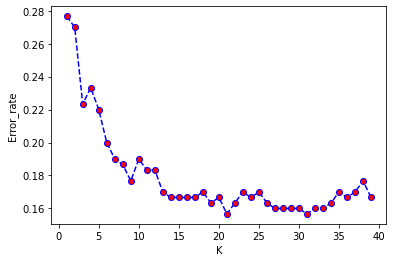

In [25]:
plt.plot(range(1,40),error_rate,marker='o',linestyle='dashed',color='blue',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Error_rate')

In [26]:
## as per the graph it seems that value of K is 21
finalKNN=KNeighborsClassifier(n_neighbors=21)
finalKNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [27]:
predictions=finalKNN.predict(X_test)

In [29]:
print(classification_report(predictions,y_test))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84       151
           1       0.83      0.86      0.84       149

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [30]:
###from the graph , you can see that we observed the best value of error rate at k=21.
# that's why the function to determine the best value of k was written
## otherwise manual approach and checking the metrics for each k neioghnour would have been a tedious approach